# Housing Prediction


## Introduction
Predict house pricing using advanced regression

## Problem Statement
Predict the price of a house based on the dataset from Kaggle


### Data Preparation
- Missing values
- Categorical variables
- Numeric variables
- Ranking variables
- Feature engineering
- Correlation
- Selecting the best variable

### Modeling
- Combine data (train.csv and test.csv)
- Clean and fill in missing values
- Separate train and test dataset
- Split the training dataset into train and test
- Train model and test
- Use Gradient Boosting and Random forest regressors
- Mean absolute error or mean square error
- Predict on actual Kaggle test dataset

## Data Dictionary
Data fields
Here is a brief version of what you will find in the data description file.
1. SalePrice the properties sale price in dollars. This is the target variable that you are trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


## Load Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data Exploration

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## train and test data
- df_train is 81 columns and df_test is 80 columns. The missing column is the target column SalePrice in df_test data
- We will combine the two datasets and clean the data

In [9]:
df_train['train'] = 1
df_test['train'] = 0
df = pd.concat([df_train, df_test], axis=0, sort=False)
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
1098,2559,30,RL,54.0,7223,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,4,2007,WD,Normal,NaN,0
1326,2787,50,RM,56.0,9576,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2006,WD,Normal,NaN,0
265,1726,60,RL,70.0,7703,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2009,WD,Normal,NaN,0
1053,2514,20,RL,155.0,20064,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN,0
1389,1390,50,RM,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Normal,131000.0,1
31,1492,30,RH,70.0,9800,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN,0
850,2311,120,RL,48.0,3242,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Normal,NaN,0
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,9,2009,WD,Normal,135000.0,1
1320,1321,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,156500.0,1
881,2342,20,RL,74.0,8847,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,NaN,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


In [12]:
df.shape

(2919, 82)

In [13]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917,-0.866025
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284,-0.005658
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799,0.031480
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843,0.044237
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982,0.007269
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856,0.009676
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897,-0.001485
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101,0.028792
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493,0.008299
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420,0.004869


## Missing Values

In [14]:
df.isnull().sum().sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
train              0
Length: 82, dtype: int64

### Missing Values count
- PoolQC,2909 missing values from 2919 rows
- MiscFeature,2814 missing values from 2919 rows
- Alley,2721 missing values from 2919 rows
- Fence,2348 missing values from 2919 rows
- MasVnrType,1766 missing values from 2919 rows
- SalePrice,1459 missing values from 2919 rows
- FireplaceQu,1420 missing values from 2919 rows
- LotFrontage,486 missing values from 2919 rows
- GarageCond,159 missing values from 2919 rows
- GarageFinish,159 missing values from 2919 rows
- GarageYrBlt,159 missing values from 2919 rows
- GarageQual,159 missing values from 2919 rows
- GarageType,157 missing values from 2919 rows
- BsmtExposure,82 missing values from 2919 rows
- BsmtCond,82 missing values from 2919 rows
- BsmtQual,81 missing values from 2919 rows
- BsmtFinType2,80 missing values from 2919 rows
- BsmtFinType1,79 missing values from 2919 rows
- MasVnrArea,23 missing values from 2919 rows
- MSZoning,4 missing values from 2919 rows
- Functional,2 missing values from 2919 rows
- BsmtFullBath,2 missing values from 2919 rows
- Utilities,2 missing values from 2919 rows
- BsmtHalfBath,2 missing values from 2919 rows
- BsmtFinSF1,1 missing values from 2919 rows
- GarageCars,1 missing values from 2919 rows
- GarageArea,1 missing values from 2919 rows
- Electrical,1 missing values from 2919 rows
- TotalBsmtSF,1 missing values from 2919 rows
- Exterior2nd,1 missing values from 2919 rows
- Exterior1st,1 missing values from 2919 rows
- BsmtUnfSF,1 missing values from 2919 rows
- SaleType,1 missing values from 2919 rows
- KitchenQual,1 missing values from 2919 rows
- BsmtFinSF2,1 missing values from 2919 rows


In [15]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType'], axis=1)

In [16]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

<Axes: xlabel='FireplaceQu', ylabel='count'>

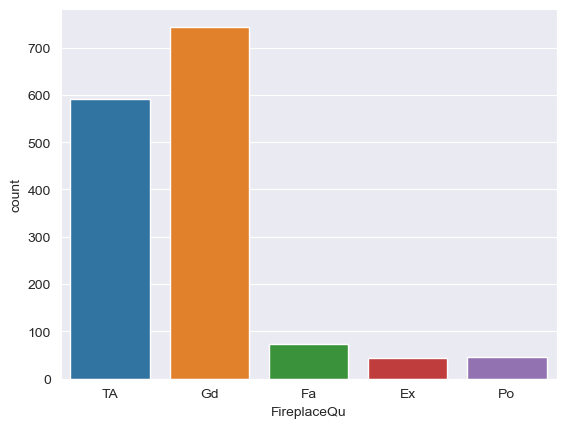

In [17]:
# plotting the FireplaceQu
sns.countplot(x='FireplaceQu', data=df)

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [19]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

<Axes: xlabel='LotFrontage', ylabel='Density'>

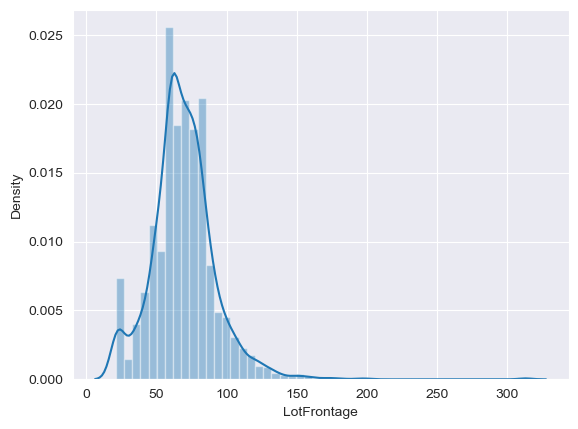

In [20]:
sns.distplot(df['LotFrontage'])

In [21]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [22]:
df['GarageCond'].value_counts()

GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

<Axes: xlabel='GarageCond', ylabel='count'>

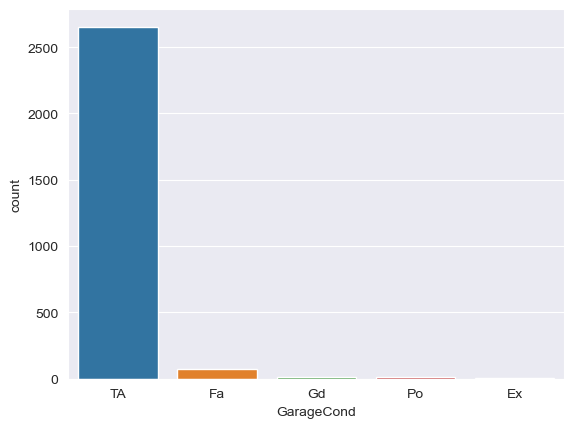

In [23]:
sns.countplot(x='GarageCond', data=df)

In [24]:
df['GarageCond'] = df['GarageCond'].fillna('NA')

In [25]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64

In [26]:
df['GarageFinish'] = df['GarageFinish'].fillna('NA')

In [27]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: count, Length: 103, dtype: int64

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

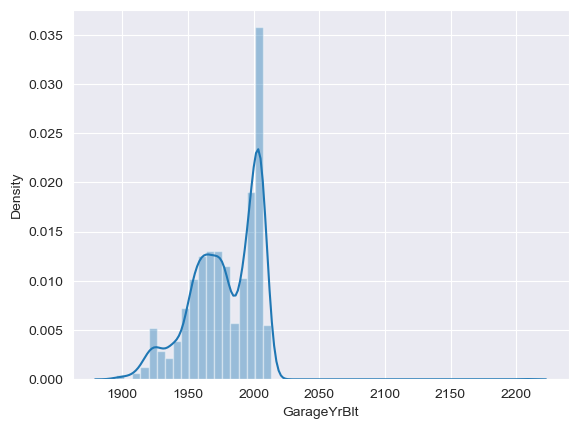

In [28]:
sns.distplot(df['GarageYrBlt'])

In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [30]:
df['GarageQual'].value_counts()

GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64

In [31]:
df['GarageQual'] = df['GarageQual'].fillna('NA')

<Axes: xlabel='GarageType', ylabel='count'>

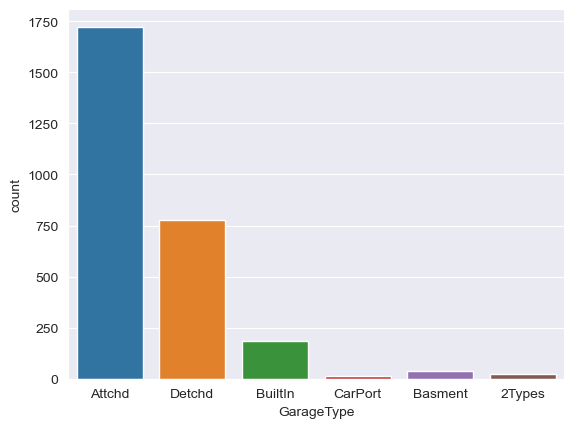

In [32]:
sns.countplot(x='GarageType', data=df)

In [33]:
df['GarageType'].value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

<Axes: xlabel='GarageType', ylabel='count'>

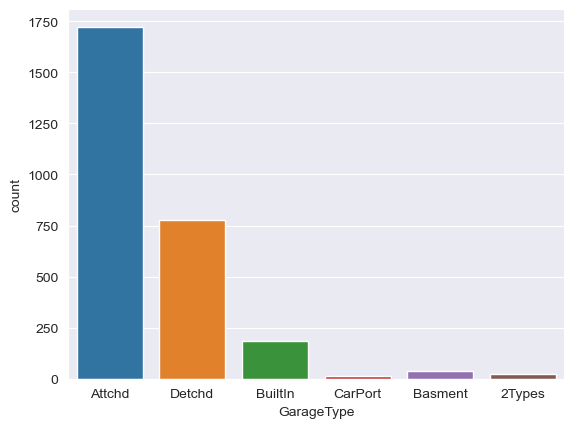

In [34]:
sns.countplot(x='GarageType', data=df)

In [35]:
df['GarageType'] = df['GarageType'].fillna('NA')

In [36]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [37]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')

<Axes: xlabel='BsmtCond', ylabel='count'>

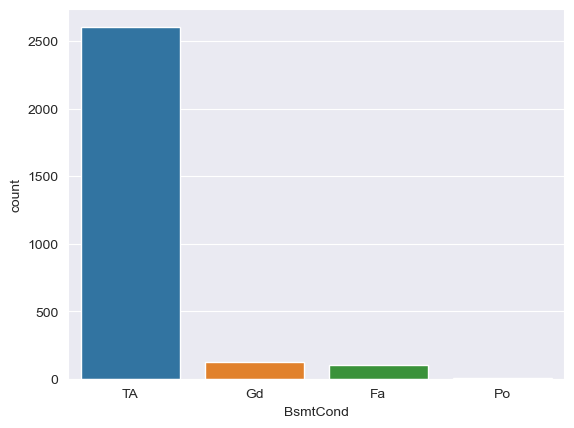

In [38]:
sns.countplot(x='BsmtCond', data=df)

In [39]:
df['BsmtCond'].value_counts()

BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

In [40]:
df['BsmtCond'] = df['BsmtCond'].fillna('NA')

In [41]:
df['BsmtQual'].value_counts()

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

In [42]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')

<Axes: xlabel='BsmtFinType2', ylabel='count'>

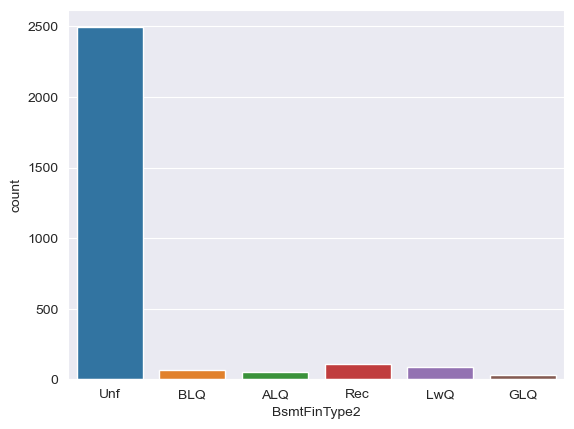

In [43]:
sns.countplot(x='BsmtFinType2', data=df)

In [44]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64

In [45]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

<Axes: xlabel='BsmtFinType1', ylabel='count'>

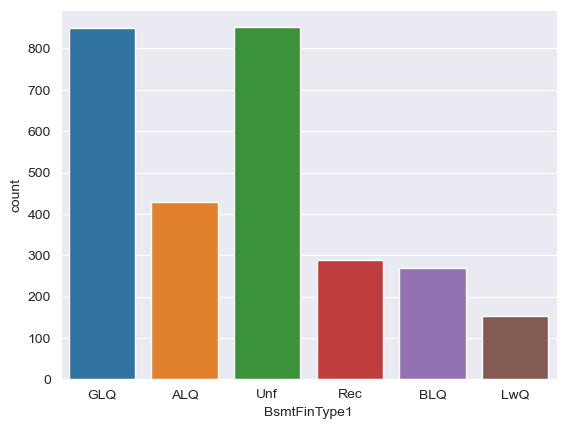

In [46]:
sns.countplot(x='BsmtFinType1', data=df)

In [47]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64

In [48]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')

<Axes: xlabel='Electrical', ylabel='count'>

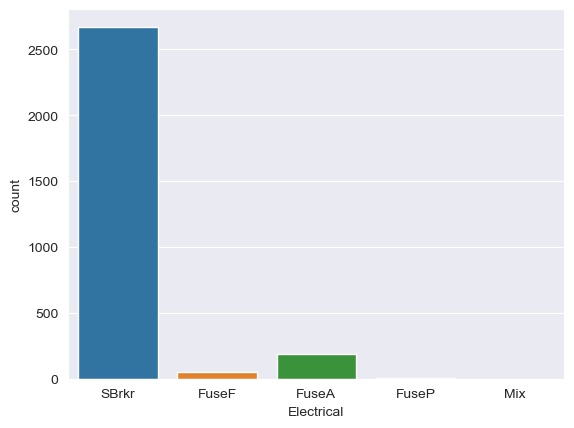

In [49]:
sns.countplot(x='Electrical', data=df)

In [50]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [51]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

<Axes: xlabel='MSZoning', ylabel='count'>

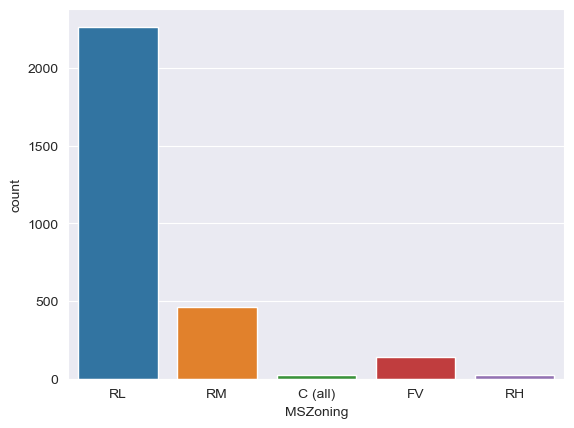

In [52]:
sns.countplot(x='MSZoning', data=df)

In [53]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [54]:
df['MSZoning'] = df['MSZoning'].fillna('RL')

<Axes: xlabel='Functional', ylabel='count'>

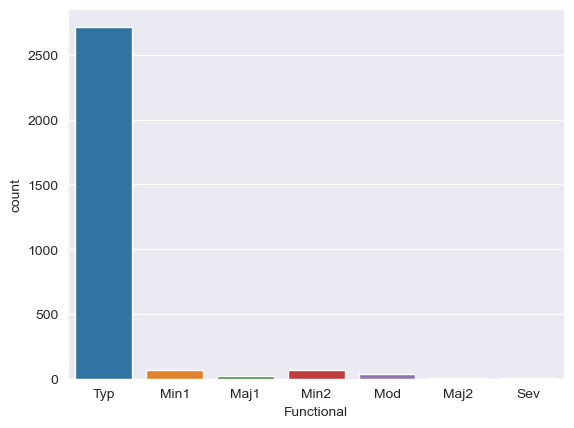

In [55]:
sns.countplot(x='Functional', data=df)

In [56]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [57]:
df['Functional'] = df['Functional'].fillna('Typ')

<Axes: xlabel='BsmtFullBath', ylabel='count'>

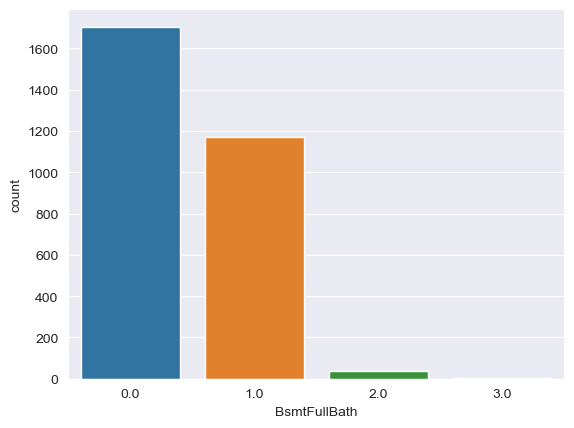

In [58]:
sns.countplot(x='BsmtFullBath', data=df)

In [59]:
df['BsmtFullBath'].value_counts()

BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64

In [60]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

<Axes: xlabel='Utilities', ylabel='count'>

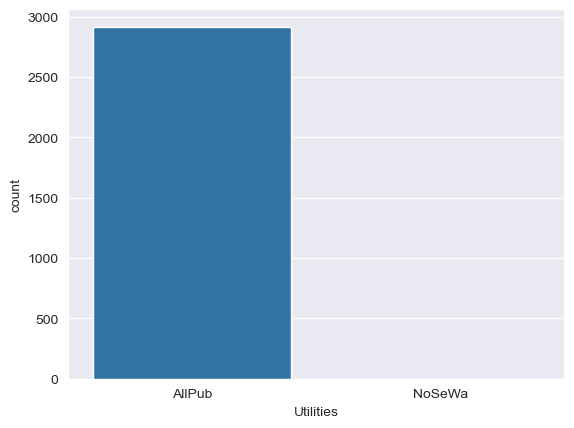

In [61]:
sns.countplot(x='Utilities', data=df)

In [62]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [63]:
df['Utilities'] = df['Utilities'].fillna('AllPub')

In [64]:
df['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64

In [65]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [66]:
df['BsmtFinSF1'].value_counts()

BsmtFinSF1
0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
383.0       1
1085.0      1
900.0       1
1022.0      1
337.0       1
Name: count, Length: 991, dtype: int64

In [67]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [68]:
df['GarageCars'].value_counts()

GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64

In [69]:
df['GarageCars'] = df['GarageCars'].fillna(0)

In [70]:
df['GarageArea'].value_counts()

GarageArea
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
872.0       1
923.0       1
192.0       1
1025.0      1
272.0       1
Name: count, Length: 603, dtype: int64

In [71]:
df['GarageArea'] = df['GarageArea'].fillna(0)

In [72]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [73]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [74]:
df['TotalBsmtSF'].value_counts()

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [75]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [76]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [77]:
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')

In [78]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [79]:
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')

In [80]:
df['BsmtUnfSF'].value_counts()

BsmtUnfSF
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: count, Length: 1135, dtype: int64

In [81]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)

In [82]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [83]:
df['SaleType'] = df['SaleType'].fillna('WD')

In [84]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [85]:
df['KitchenQual'] = df['KitchenQual'].fillna('TA')

In [86]:
df['BsmtFinSF2'].value_counts()

BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64

In [87]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)

In [88]:
df.isnull().sum().sort_values(ascending=False)

SalePrice      1459
Id                0
HalfBath          0
FireplaceQu       0
Fireplaces        0
               ... 
ExterQual         0
MasVnrArea        0
Exterior2nd       0
Exterior1st       0
train             0
Length: 77, dtype: int64

In [89]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.017203,...,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917,-0.866025
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064002,...,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284,-0.005658
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203107,...,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265,0.334820,0.028738
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194168,...,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843,0.044237
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.282150,...,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982,0.007269
OverallCond,-0.002839,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135752,-0.050823,...,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856,0.009676
YearBuilt,-0.016581,0.034409,0.116905,0.024128,0.597554,-0.368477,1.000000,0.612235,0.312579,0.279780,...,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897,-0.001485
YearRemodAdd,-0.050438,0.043315,0.085608,0.021612,0.571532,0.047654,0.612235,1.000000,0.196117,0.152576,...,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101,0.028792
MasVnrArea,-0.025126,0.005422,0.202210,0.125354,0.430961,-0.135752,0.312579,0.196117,1.000000,0.302141,...,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117,-0.018457,0.475210,0.008266
BsmtFinSF1,-0.017203,-0.064002,0.203107,0.194168,0.282150,-0.050823,0.279780,0.152576,0.302141,1.000000,...,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,-0.000671,0.022500,0.386420,0.005200


## Categorical Variables
Categorical variables are variables that can be divided into categories. For example, the variable 'MSZoning' has the following categories: RL, RM, C, FV, RH. We will convert these variables into dummy variables


In [90]:
## convert all categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

In [91]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False


In [92]:
df.shape

(2919, 246)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 246 entries, Id to SaleCondition_Partial
dtypes: bool(207), float64(12), int64(27)
memory usage: 1.5 MB


In [94]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.272011,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.606014,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


In [95]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.017203,...,-0.018450,-0.017583,0.022635,-0.002452,-0.020419,0.034629,-0.007055,0.014494,-0.019504,0.022167
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064002,...,-0.012245,0.001218,-0.040736,-0.018118,0.039077,0.011253,0.037366,-0.023187,0.027341,-0.045302
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203107,...,0.002190,-0.041038,0.114645,-0.003890,-0.083358,-0.046903,0.007403,0.015590,-0.082070,0.112441
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194168,...,-0.006994,-0.015732,0.031601,-0.004067,-0.013592,-0.020429,0.024241,0.017927,-0.022898,0.033434
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.282150,...,0.000869,-0.045148,0.338330,-0.052783,-0.195075,-0.049636,-0.040738,-0.023605,-0.134282,0.333192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.034629,0.011253,-0.046903,-0.020429,-0.049636,-0.051836,-0.077741,-0.078213,-0.018629,-0.028047,...,-0.003573,-0.003368,-0.019187,-0.003150,0.025342,1.000000,-0.005850,-0.008130,-0.138487,-0.019448
SaleCondition_Alloca,-0.007055,0.037366,0.007403,0.024241,-0.040738,-0.025736,-0.025116,-0.034022,-0.017984,0.026130,...,-0.005064,-0.004773,-0.027190,-0.004464,0.035914,-0.005850,1.000000,-0.011521,-0.196256,-0.027560
SaleCondition_Family,0.014494,-0.023187,0.015590,0.017927,-0.023605,-0.032058,-0.036093,-0.049794,-0.017978,-0.026187,...,0.092195,0.045983,-0.037787,0.050036,-0.014561,-0.008130,-0.011521,1.000000,-0.272742,-0.038301
SaleCondition_Normal,-0.019504,0.027341,-0.082070,-0.022898,-0.134282,0.168425,-0.137934,-0.102889,-0.069411,-0.016976,...,-0.038942,0.007156,-0.643684,-0.087334,0.621477,-0.138487,-0.196256,-0.272742,1.000000,-0.652444


## Numeric Variables
Numeric variables are variables that are numbers. We will convert these variables into

In [96]:
df_numeric = df.select_dtypes(include=[np.number])
df.shape, df_numeric.shape

((2919, 246), (2919, 39))

## Ranking Variables
Ranking variables are variables that are ranked. We will convert these variables into

In [97]:
df_ranking = df.select_dtypes(include=['object'])
df_ranking.shape, df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Empty DataFrame


((2919, 0), None)

In [98]:
df_ranking.head()

""
0
1
2
3
4


In [99]:
#df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

## Splitting the data into train and test

In [100]:
df_train = df[df['train'] == 1]
df_test = df[df['train'] == 0]
df_test = df_test.drop(['SalePrice'], axis=1)

## Correlation
Correlation is a statistical measure that describes the association between random variables. We will use the correlation to select the best variables for our model

In [101]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
                    ...   
BsmtQual_TA      -0.452394
FireplaceQu_NA   -0.471908
KitchenQual_TA   -0.519298
ExterQual_TA     -0.589044
train                  NaN
Name: SalePrice, Length: 246, dtype: float64

## Selecting the best variables
We will select the best variables based on the correlation values above and use them to train our model for prediction of house pricing 

In [102]:
best_columns = df_train.corr()['SalePrice'].sort_values(ascending=False).head(45).index
df_train_best = df_train[best_columns]

## Modeling
Modeling is the process of training a machine learning model to predict the target variable. We will use the RandomForestRegressor, GradientBoosting to train our model and predict the house pricing


In [103]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [104]:
rfModel = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fit = rfModel.fit(X_train, y_train)
rfModel.score(X_test, y_test)



0.887515560502718

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
gbModel = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_fit = gbModel.fit(X_train, y_train)
gbModel.score(X_test, y_test)


0.9008726113472946

## Mean Absolute Error
Mean Absolute Error (MAE) is the average of the absolute differences between predictions and actual values. It gives us an idea of how wrong the model is on average 


In [106]:

rf_pred = rfModel.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
mae

17789.13801369863

In [107]:

gb_pred = gbModel.predict(X_test)
mae = mean_absolute_error(y_test, gb_pred)
mae

17182.069563877165

## Mean Square Error
Mean Square Error (MSE) is the average of the squares of the errors. It gives us an idea of how wrong the model is on average 

In [108]:
from sklearn.metrics import mean_squared_error


In [109]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
mse, rmse


(862792344.1767569, 29373.327087287147)

In [110]:
mse = mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)
mse, rmse

(760339407.03287, 27574.25261059436)

## Predict on actual Kaggle test dataset
This is the final step where we predict the house pricing on the actual Kaggle test dataset and submit the results

In [111]:
rf_pred = rfModel.predict(df_test)
rf_pred


array([131351.  , 153237.5 , 178014.  , ..., 149286.  , 115696.  ,
       222802.35])

In [112]:
## Feature Importance


Feature ranking:
1. feature 4 (0.559424)
2. feature 16 (0.121946)
3. feature 14 (0.034502)
4. feature 12 (0.033642)
5. feature 9 (0.029320)
6. feature 13 (0.027242)
7. feature 3 (0.017314)
8. feature 27 (0.015753)
9. feature 6 (0.012972)
10. feature 26 (0.012348)
11. feature 2 (0.008621)
12. feature 23 (0.006764)
13. feature 7 (0.006720)
14. feature 29 (0.006144)
15. feature 25 (0.006036)
16. feature 19 (0.005695)
17. feature 11 (0.005078)
18. feature 28 (0.004660)
19. feature 198 (0.004594)
20. feature 160 (0.004508)
21. feature 0 (0.004213)
22. feature 192 (0.003865)
23. feature 5 (0.003539)
24. feature 8 (0.003531)
25. feature 32 (0.003376)
26. feature 35 (0.003242)
27. feature 1 (0.002603)
28. feature 24 (0.002091)
29. feature 45 (0.001804)
30. feature 215 (0.001797)
31. feature 33 (0.001627)
32. feature 148 (0.001618)
33. feature 211 (0.001581)
34. feature 167 (0.001563)
35. feature 21 (0.001505)
36. feature 36 (0.001385)
37. feature 208 (0.001088)
38. feature 199 (0.001061)
39. f

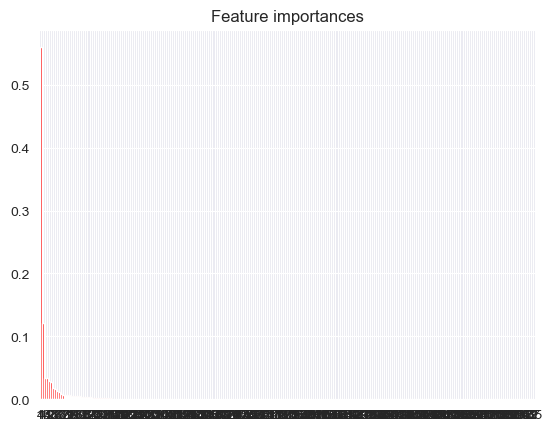

In [113]:
importances = rfModel.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


## Fill in the missing values in the test dataset


In [114]:
df_test['SalePrice'] = rf_pred
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,True,False,131351.00
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,True,False,153237.50
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,True,False,178014.00
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,True,False,189785.70
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,True,False,204127.22


In [115]:
df_test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)


In [116]:
df_test[['Id', 'SalePrice']].head()    

,Id,SalePrice
0,1461,131351.00
1,1462,153237.50
2,1463,178014.00
3,1464,189785.70
4,1465,204127.22


## Kaggle Submission
- We will submit the results to Kaggle
- The RandomForestRegressor scored 0.88 and GradientBoostingRegressor scored 0.90

## Conclusion
- we have successfully predicted the house pricing using the RandomForestRegressor and GradientBoostingRegressor. We have also submitted the results to Kaggle
- The RandomForestRegressor scored 0.88 and GradientBoostingRegressor scored 0.90


## Summary of the project
- We loaded the data and explored the data
- We combined the train and test data
- We cleaned the data by filling in the missing values
- We converted the categorical variables into dummy variables
- split the data into train and test
- correlated the data and selected base on the sales price
- trained the model using RandomForestRegressor and GradientBoostingRegressor
- predicted the house pricing
- submitted the results to Kaggle
- The RandomForestRegressor scored 0.88 and GradientBoostingRegressor scored 0.90

## Future Work
- use other models to predict the house pricing
- use other techniques to fill in the missing values
- use other techniques to select the best variables
- use other techniques to improve the model
- use improve Data visualization techniques
- delete the columns that are not useful in the model, next time don't drop the columns(find a way to use them :)))))